<a href="https://colab.research.google.com/github/akhunzakp/Machine-Learning2025/blob/main/JS07_TG_2341720259_Yuma_Akhunza_K_P.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Praktikum 1**

> Exact NN vs. ANNOY

JS07 - Approximate Nearest Neighbors (ANN)

## **Langkah 1 - Install Library ANNOY**

In [15]:
# Install ANNOY
!pip install annoy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for annoy: filename=annoy-1.17.3-cp312-cp312-linux_x86_64.whl size=551808 sha256=ce5d93b378bd6dce5d6598be6e141d4405d3536110abe77dbc19318fecca9cc7
  Stored in directory: /root/.cache/pip/wheels/db/b9/53/a3b2d1fe1743abadddec6aa541294b24fdbc39d7800bc57311
Successfully built annoy


## **Langkah 2 - Import Library**



In [16]:
# Import Library
import numpy as np
import matplotlib.pyplot as plt
import time

from annoy import AnnoyIndex

## **Langkah 3 - Membuat Dataset Dummy**

Pada langkah ini Anda akan membuat dataset dummy dan memilih titik awal untuk cluster (query point).

In [17]:
# Build Random Dataset and Query Point
np.random.seed(42)
n_points = 1000
X = np.random.rand(n_points, 2) * 100  # random value at 100x100 space

# Query point (pick 1 random data point)
query = X[np.random.randint(0, n_points)]

## **Langkah 4 - Exact NN**

Pada langkah ini, Anda akan mengkomputasi jarak terdekat dengan menggunakan metode brute force. Perhatikan waktu yang dihasilkan!

In [18]:
# Compute Exact NN Using Brute Force
# It will visit the data one by one
start = time.time()
distances = np.linalg.norm(X - query, axis=1)
idx_exact = np.argsort(distances)[:3]  # ambil 3 terdekat
time_exact = time.time() - start

print("Exact NN index:", idx_exact)
print("Exact NN jarak:", distances[idx_exact])
print("Waktu Exact:", round(time_exact*1000, 4), "ms")

Exact NN index: [219 898 593]
Exact NN jarak: [0.         1.36915938 2.27931544]
Waktu Exact: 12.5618 ms


## **Langkah 5 - Perhitungan Jarak dengan ANNOY**

Selanjutnya, bandingkan dengan ANNOY. Jumlah Tree yang digunakan adalah 3.

In [19]:
# ANNOY 3 Tree
f = 2  # dimensi
t = AnnoyIndex(f, 'euclidean')
for i, vec in enumerate(X):
    t.add_item(i, vec)

t.build(3)  # 3 trees

start = time.time()
idx_ann = t.get_nns_by_vector(query, 3)  # find 3 NN
time_ann = time.time() - start

print("\nAnnoy NN index:", idx_ann)
print("Annoy NN jarak:", [np.linalg.norm(X[i]-query) for i in idx_ann])
print("Waktu Annoy:", round(time_ann*1000, 4), "ms")


Annoy NN index: [219, 898, 770]
Annoy NN jarak: [np.float64(0.0), np.float64(1.369159376273702), np.float64(2.568167959732514)]
Waktu Annoy: 0.1314 ms


## **Langkah 6 - Visualisasi Hasil NN**

Untuk mengetahui tingkat ketepatan prediksi NN dari ANNOY, lakukan proses visualisasi sehingga Anda dapat mengetahui titik exact NN dibandingkan dengan perkiraan NN dari ANNOY.

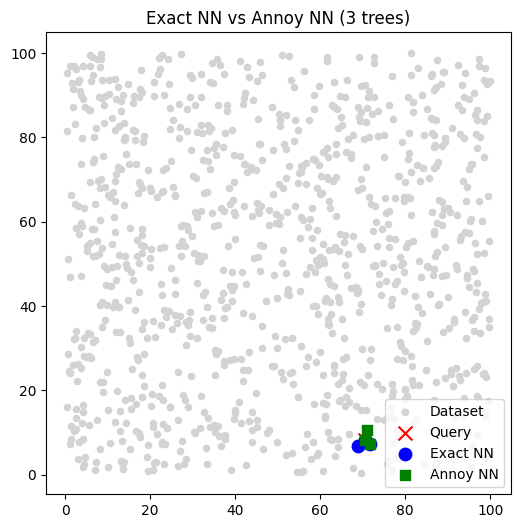

In [20]:
# Visualize
# Knowing the NN produced by Exact NN and ANNOY
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c="lightgray", s=20, label="Dataset")
plt.scatter(query[0], query[1], c="red", marker="x", s=100, label="Query")

# Exact NN ditandai biru
plt.scatter(X[idx_exact,0], X[idx_exact,1], c="blue", s=80, label="Exact NN")

# Annoy NN ditandai hijau
plt.scatter(X[idx_ann,0], X[idx_ann,1], c="green", s=50, marker="s", label="Annoy NN")

plt.legend()
plt.title("Exact NN vs Annoy NN (3 trees)")
plt.show()

# **Praktikum 2**

> Exact NN vs. FAISS

## **Langah 1 - Instal FAISS**

In [21]:
!pip install faiss-cpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 64.4 MB/s eta 0:00:00


## **Langkah 2 - Import Library**

In [22]:
import numpy as np
import faiss
import matplotlib.pyplot as plt
import time

## **Langkah 3 - Membuat Dummy Dataset**

In [23]:
# Build random data
np.random.seed(42)
X = np.random.rand(1000, 2).astype('float32')  # 1000 data 2D
query = np.array([[0.5, 0.5]], dtype='float32')  # query point

## **Langkah 4 - Buat Model Exact NN**

In [25]:
# Search NN using Exact NN
index_flat = faiss.IndexFlatL2(2)   # L2 = Euclidean distance
index_flat.add(X)

# Compute Exact NN Time
start = time.time()
D_flat, I_flat = index_flat.search(query, 3)  # Find 3 NN
end = time.time()
time_flat = end - start

## **Langkah 5 - Buat Model FAISS**

In [26]:
# Compute FAISS
nlist = 10   # n-cluster (inverted list)
m = 2        # number of subvector
quantizer = faiss.IndexFlatL2(2)   # used by IVF for initiatl cluster
index_ivfpq = faiss.IndexIVFPQ(quantizer, 2, nlist, m, 8)  # 8 bit per subvector

index_ivfpq.train(X)  # training centroid
index_ivfpq.add(X)

start = time.time()
D_ivfpq, I_ivfpq = index_ivfpq.search(query, 3)
end = time.time()
time_ivfpq = end - start

## **Langkah 6 - Cek Hasil Performa**

In [27]:
# Print The Peformances
print("Exact NN (Flat) indices:", I_flat, "distances:", D_flat)
print("IVF+PQ indices:", I_ivfpq, "distances:", D_ivfpq)
print("Waktu Exact:", time_flat)
print("Waktu IVF+PQ:", time_ivfpq)

Exact NN (Flat) indices: [[137 170 750]] distances: [[0.00013095 0.00077404 0.00079751]]
IVF+PQ indices: [[137 170 750]] distances: [[0.00012945 0.00079226 0.00080067]]
Waktu Exact: 0.00021266937255859375
Waktu IVF+PQ: 0.00017499923706054688


## **Langkah 7 - Visualisasi**

Untuk lebih jelas mengetahui perkiraan NN yang dibuat oleh FAISS, Anda dapat melakukan visualisasi.

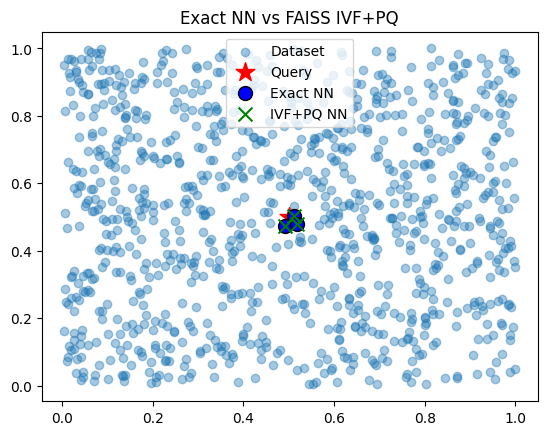

In [28]:
# Visualize
plt.scatter(X[:,0], X[:,1], alpha=0.4, label="Dataset")
plt.scatter(query[:,0], query[:,1], c='red', marker='*', s=200, label="Query")

# Flat NN -> Exact NN
plt.scatter(X[I_flat[0],0], X[I_flat[0],1], c='blue', s=100, edgecolor='k', label="Exact NN")

# IVF+PQ NN -> FAISS
plt.scatter(X[I_ivfpq[0],0], X[I_ivfpq[0],1], c='green', marker='x', s=100, label="IVF+PQ NN")

plt.legend()
plt.title("Exact NN vs FAISS IVF+PQ")
plt.show()

# **Praktikum 3**

> Exact NN vs. HNSW

## **Langkah 1 - Instal Library**

In [3]:
!pip install hnswlib

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for hnswlib: filename=hnswlib-0.8.0-cp312-cp312-linux_x86_64.whl size=2528145 sha256=b3416d0010851fb6bbbf33ab8bbf55ee55cbf143cc26cc89b8d74ffe12d787c1
  Stored in directory: /root/.cache/pip/wheels/ac/39/b3/cbd7f9cbb76501d2d5fbc84956e70d0b94e788aac87bda465e
Successfully built hnswlib


## **Langkah 2 - Import Library**

In [4]:
import hnswlib
import numpy as np
import time
from sklearn.neighbors import NearestNeighbors

## **Langkah 3 - Buat Dataset Dummy**

In [5]:
# Build Dummy Dataset
num_elements = 1000
dim = 2
data = np.random.random((num_elements, dim)).astype(np.float32)

# Query point
query = np.array([[0.5, 0.5]], dtype=np.float32)
k = 5  # cari 5 tetangga terdekatn

## **Langkah 4 - Buat Model NN**

In [6]:
# Build NN Model
nn = NearestNeighbors(n_neighbors=k, algorithm='brute', metric='euclidean')
nn.fit(data)

# Compute time performace
start = time.time()
distances, indices = nn.kneighbors(query)
end = time.time()

print("=== Exact NN ===")
print("Indices:", indices)
print("Distances:", distances)
print("Waktu:", end - start, "s")

=== Exact NN ===
Indices: [[302 976 173 775 777]]
Distances: [[0.02581025 0.03208065 0.03693281 0.03807293 0.0482225 ]]
Waktu: 0.1054525375366211 s


## **Langkah 5 - Buat Model HNSW**

In [7]:
# Initiate Index
p = hnswlib.Index(space='l2', dim=dim)

# Define Max Elements
p.init_index(max_elements=num_elements, ef_construction=100, M=16)

# Add Data
p.add_items(data)

# Set searching parameter
p.set_ef(50)   # tradeoff speed vs accuracy

start = time.time()
labels, distances = p.knn_query(query, k=k)
end = time.time()

print("\n=== HNSW ===")
print("Indices:", labels)
print("Distances:", distances)
print("Waktu:", end - start, "s")


=== HNSW ===
Indices: [[302 976 173 775 777]]
Distances: [[0.00066617 0.00102917 0.00136403 0.00144955 0.00232541]]
Waktu: 0.00015783309936523438 s


# **Praktikum 4**

> ANNOY vs. FAISS vs. HNSW

In [29]:
import numpy as np
import time
from annoy import AnnoyIndex
import faiss
import hnswlib

# ===============================
# Build 1mio rows with 5D
# ===============================
n_data = 1_000_000   # try 100_000 if you have limited memory
dim = 5
X = np.random.random((n_data, dim)).astype(np.float32)

# Query point
query = np.random.random((1, dim)).astype(np.float32)
k = 10

# ===============================
# 2. Annoy
# ===============================
print("=== Annoy ===")
ann_index = AnnoyIndex(dim, 'euclidean')

start = time.time()
for i in range(n_data):
    ann_index.add_item(i, X[i])
ann_index.build(10)  # 10 trees
build_time = time.time() - start

start = time.time()
neighbors = ann_index.get_nns_by_vector(query[0], k, include_distances=True)
query_time = time.time() - start

print("Build time:", build_time, "detik")
print("Query time:", query_time, "detik")
print("Neighbors:", neighbors[0][:5], "...")

# ===============================
# 3. FAISS (Flat Index)
# ===============================
print("\n=== FAISS (IndexFlatL2) ===")
faiss_index = faiss.IndexFlatL2(dim)

start = time.time()
faiss_index.add(X)
build_time = time.time() - start

start = time.time()
distances, indices = faiss_index.search(query, k)
query_time = time.time() - start

print("Build time:", build_time, "detik")
print("Query time:", query_time, "detik")
print("Neighbors:", indices[0][:5], "...")

# ===============================
# 4. HNSW (hnswlib)
# ===============================
print("\n=== HNSW (hnswlib) ===")
hnsw_index = hnswlib.Index(space='l2', dim=dim)

start = time.time()
hnsw_index.init_index(max_elements=n_data, ef_construction=200, M=16)
hnsw_index.add_items(X)
build_time = time.time() - start

hnsw_index.set_ef(50)

start = time.time()
labels, distances = hnsw_index.knn_query(query, k=k)
query_time = time.time() - start

print("Build time:", build_time, "detik")
print("Query time:", query_time, "detik")
print("Neighbors:", labels[0][:5], "...")

=== Annoy ===
Build time: 28.92135787010193 detik
Query time: 0.00022649765014648438 detik
Neighbors: [840089, 508662, 532117, 342898, 357944] ...

=== FAISS (IndexFlatL2) ===
Build time: 0.01491236686706543 detik
Query time: 0.006181478500366211 detik
Neighbors: [840089 508662 532117 342898 357944] ...

=== HNSW (hnswlib) ===
Build time: 175.3893494606018 detik
Query time: 0.0002930164337158203 detik
Neighbors: [840089 508662 532117 342898 357944] ...


# **Praktikum 5**

> Uji Performansi ANN dengan Recall Query

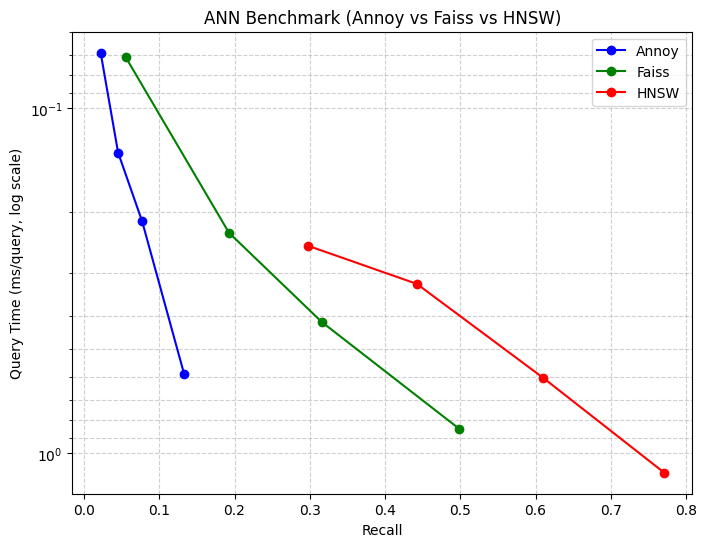

In [30]:
import numpy as np
import time
import faiss
from annoy import AnnoyIndex
import hnswlib
import matplotlib.pyplot as plt

# -------------------------------
# Dataset random
# -------------------------------
d = 128        # dimensi
nb = 100000    # jumlah database vector
nq = 1000      # jumlah query

np.random.seed(42)
xb = np.random.random((nb, d)).astype('float32')
xq = np.random.random((nq, d)).astype('float32')

# -------------------------------
# Ground truth dengan FAISS brute force
# -------------------------------
index_flat = faiss.IndexFlatL2(d)
index_flat.add(xb)
k = 10
_, gt_idx = index_flat.search(xq, k)

# -------------------------------
# Fungsi recall
# -------------------------------
def recall_at_k(I_pred, I_gt, k):
    correct = 0
    for i in range(len(I_pred)):
        correct += len(set(I_pred[i][:k]) & set(I_gt[i][:k]))
    return correct / (len(I_pred) * k)

# -------------------------------
# Benchmark Annoy
# -------------------------------
def run_annoy(xb, xq, n_trees=10, search_k=1000, k=10):
    f = xb.shape[1]
    index = AnnoyIndex(f, 'euclidean')
    for i, v in enumerate(xb):
        index.add_item(i, v)
    index.build(n_trees)

    start = time.time()
    I = [index.get_nns_by_vector(v, k, search_k=search_k) for v in xq]
    elapsed = (time.time() - start) * 1000 / len(xq)  # ms/query
    rec = recall_at_k(I, gt_idx, k)
    return rec, elapsed

# -------------------------------
# Benchmark FAISS IVF
# -------------------------------
def run_faiss(xb, xq, nlist=100, nprobe=10, k=10):
    quantizer = faiss.IndexFlatL2(d)
    index = faiss.IndexIVFFlat(quantizer, d, nlist, faiss.METRIC_L2)
    index.train(xb)
    index.add(xb)

    index.nprobe = nprobe
    start = time.time()
    _, I = index.search(xq, k)
    elapsed = (time.time() - start) * 1000 / len(xq)
    rec = recall_at_k(I, gt_idx, k)
    return rec, elapsed

# -------------------------------
# Benchmark HNSW
# -------------------------------
def run_hnsw(xb, xq, ef=100, M=16, k=10):
    num_elements = xb.shape[0]
    p = hnswlib.Index(space='l2', dim=d)
    p.init_index(max_elements=num_elements, ef_construction=200, M=M)
    p.add_items(xb)
    p.set_ef(ef)

    start = time.time()
    I, _ = p.knn_query(xq, k)
    elapsed = (time.time() - start) * 1000 / len(xq)
    rec = recall_at_k(I, gt_idx, k)
    return rec, elapsed

# -------------------------------
# Jalankan benchmark dengan beberapa parameter
# -------------------------------
results = {"Annoy": [], "Faiss": [], "HNSW": []}

# Annoy
for sk in [200, 500, 1000, 2000]:
    rec, t = run_annoy(xb, xq, n_trees=10, search_k=sk)
    results["Annoy"].append((rec, t))

# FAISS
for npb in [1, 5, 10, 20]:
    rec, t = run_faiss(xb, xq, nlist=100, nprobe=npb)
    results["Faiss"].append((rec, t))

# HNSW
for ef in [50, 100, 200, 400]:
    rec, t = run_hnsw(xb, xq, ef=ef)
    results["HNSW"].append((rec, t))

# -------------------------------
# Visualisasi trade-off
# -------------------------------
plt.figure(figsize=(8,6))
for label, color in zip(results.keys(), ["blue","green","red"]):
    recall, qtime = zip(*results[label])
    plt.plot(recall, qtime, marker="o", label=label, color=color)

plt.xlabel("Recall")
plt.ylabel("Query Time (ms/query, log scale)")
plt.yscale("log")
plt.gca().invert_yaxis()  # invert Y, makin kanan makin turun
plt.title("ANN Benchmark (Annoy vs Faiss vs HNSW)")
plt.legend()
plt.grid(True, which="both", ls="--", alpha=0.6)
plt.show()

# Tugas 1


Lakukan percobaan pada metric distance yang berbeda, 1000 vs 1.000.000 data, 2D vs 5D data, untuk algoritma,

* ANNOY

* FAISS

* HNSW

Catat performansinya dalam bentuk tabel, misa

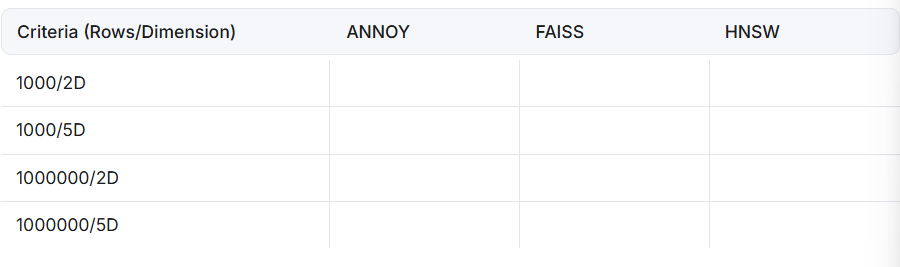

In [31]:
import numpy as np
import time
import faiss
from annoy import AnnoyIndex
import hnswlib
import pandas as pd

# -------------------------------
# Benchmark Annoy
# -------------------------------
def run_annoy_benchmark(nb, d, k=10):
    f = d
    index = AnnoyIndex(f, 'euclidean')
    data = np.random.random((nb, d)).astype('float32')
    query = np.random.random((1000, d)).astype('float32')

    build_start = time.time()
    for i, v in enumerate(data):
        index.add_item(i, v)
    index.build(10)  # 10 trees
    build_time = time.time() - build_start

    # Prepare for querying (Annoy uses vector directly)
    query_vectors = query

    query_start = time.time()
    # Using a loop for multiple queries
    for q_vec in query_vectors:
        index.get_nns_by_vector(q_vec, k)
    query_time = (time.time() - query_start) / 1000 # time per query

    return build_time, query_time

# -------------------------------
# Benchmark FAISS
# -------------------------------
def run_faiss_benchmark(nb, d, k=10):
    data = np.random.random((nb, d)).astype('float32')
    query = np.random.random((1000, d)).astype('float32')

    quantizer = faiss.IndexFlatL2(d)
    index = faiss.IndexIVFFlat(quantizer, d, 100, faiss.METRIC_L2) # nlist=100

    build_start = time.time()
    index.train(data)
    index.add(data)
    build_time = time.time() - build_start

    index.nprobe = 10 # nprobe=10
    query_start = time.time()
    _, I = index.search(query, k)
    query_time = (time.time() - query_start) / 1000 # time per query

    return build_time, query_time


# -------------------------------
# Benchmark HNSW
# -------------------------------
def run_hnsw_benchmark(nb, d, k=10):
    data = np.random.random((nb, d)).astype('float32')
    query = np.random.random((1000, d)).astype('float32')

    num_elements = nb
    p = hnswlib.Index(space='l2', dim=d)

    build_start = time.time()
    p.init_index(max_elements=num_elements, ef_construction=200, M=16)
    p.add_items(data)
    build_time = time.time() - build_start

    p.set_ef(50) # ef=50
    query_start = time.time()
    p.knn_query(query, k=k)
    query_time = (time.time() - query_start) / 1000 # time per query

    return build_time, query_time

# -------------------------------
# Run benchmark with different parameters and collect results
# -------------------------------
criteria = {
    "1000/2D": (1000, 2),
    "1000/5D": (1000, 5),
    "1000000/2D": (1000000, 2),
    "1000000/5D": (1000000, 5)
}

results = {}

print("Running benchmarks...")
for label, (nb, d) in criteria.items():
    print(f"\nCriterion: {label}")
    np.random.seed(42) # for reproducibility

    print("  Benchmarking Annoy...")
    annoy_build, annoy_query = run_annoy_benchmark(nb, d)
    print(f"    Annoy Build Time: {annoy_build:.4f} s, Query Time (per query): {annoy_query:.6f} s")


    print("  Benchmarking FAISS...")
    faiss_build, faiss_query = run_faiss_benchmark(nb, d)
    print(f"    FAISS Build Time: {faiss_build:.4f} s, Query Time (per query): {faiss_query:.6f} s")


    print("  Benchmarking HNSW...")
    hnsw_build, hnsw_query = run_hnsw_benchmark(nb, d)
    print(f"    HNSW Build Time: {hnsw_build:.4f} s, Query Time (per query): {hnsw_query:.6f} s")

    results[label] = {
        "Annoy Build Time (s)": annoy_build,
        "Annoy Query Time (s/query)": annoy_query,
        "FAISS Build Time (s)": faiss_build,
        "FAISS Query Time (s/query)": faiss_query,
        "HNSW Build Time (s)": hnsw_build,
        "HNSW Query Time (s/query)": hnsw_query
    }

# -------------------------------
# Display results in a table
# -------------------------------
df_results = pd.DataFrame.from_dict(results, orient='index')
df_results = df_results[['Annoy Build Time (s)', 'Annoy Query Time (s/query)',
                         'FAISS Build Time (s)', 'FAISS Query Time (s/query)',
                         'HNSW Build Time (s)', 'HNSW Query Time (s/query)']]

print("\n--- Performance Comparison Table ---")
display(df_results)

Running benchmarks...

Criterion: 1000/2D
  Benchmarking Annoy...
    Annoy Build Time: 0.0263 s, Query Time (per query): 0.000024 s
  Benchmarking FAISS...
    FAISS Build Time: 0.0016 s, Query Time (per query): 0.000005 s
  Benchmarking HNSW...
    HNSW Build Time: 0.0493 s, Query Time (per query): 0.000009 s

Criterion: 1000/5D
  Benchmarking Annoy...
    Annoy Build Time: 0.0149 s, Query Time (per query): 0.000021 s
  Benchmarking FAISS...
    FAISS Build Time: 0.0017 s, Query Time (per query): 0.000004 s
  Benchmarking HNSW...
    HNSW Build Time: 0.0588 s, Query Time (per query): 0.000013 s

Criterion: 1000000/2D
  Benchmarking Annoy...
    Annoy Build Time: 29.6265 s, Query Time (per query): 0.000055 s
  Benchmarking FAISS...
    FAISS Build Time: 0.1693 s, Query Time (per query): 0.000516 s
  Benchmarking HNSW...
    HNSW Build Time: 106.4258 s, Query Time (per query): 0.000017 s

Criterion: 1000000/5D
  Benchmarking Annoy...
    Annoy Build Time: 22.2106 s, Query Time (per que

,Annoy Build Time (s),Annoy Query Time (s/query),FAISS Build Time (s),FAISS Query Time (s/query),HNSW Build Time (s),HNSW Query Time (s/query)
1000/2D,0.026346,0.000024,0.001638,0.000005,0.049272,0.000009
1000/5D,0.014888,0.000021,0.001670,0.000004,0.058832,0.000013
1000000/2D,29.626470,0.000055,0.169271,0.000516,106.425797,0.000017
1000000/5D,22.210624,0.000063,0.208122,0.000480,165.706224,0.000035


> **Ringkasan Kode Benchmark ANN (Approximate Nearest Neighbor)**

Dokumen ini menjelaskan tujuan, komponen, dan skenario pengujian dari skrip Python untuk membandingkan kinerja tiga pustaka ANN populer: Annoy, FAISS, dan HNSW.

1. Tujuan Kode
Skrip Python ini bertujuan untuk mengukur kinerja (performansi) tiga pustaka Approximate Nearest Neighbor (ANN) terkemuka:

* Annoy

* FAISS

* HNSW

Metrik yang diukur meliputi:

* Waktu Pembuatan Index (Build Time): Durasi yang dibutuhkan untuk membuat struktur index.

* Waktu Kueri (Query Time): Durasi yang dibutuhkan untuk mencari tetangga terdekat.

Pengujian dilakukan pada dataset dengan berbagai ukuran dan dimensi vektor.


**Skrip ini adalah alat yang efektif untuk:**

* Membandingkan efisiensi antara Annoy, FAISS, dan HNSW.

* Mengukur kecepatan mereka dalam membuat dan mencari index vektor.

* Membantu pengambilan keputusan mengenai algoritma ANN mana yang paling cepat atau paling scalable (mudah diskalakan) berdasarkan ukuran dataset dan dimensi vektor yang dihadapi.

# **Tugas 2**

Lakukan percobaan penggunaan ANNOY, FAISS, dan HNSWLIB pada dataset sekunder berukuran besar (Micro Spotify) pada link berikut: https://www.kaggle.com/datasets/bwandowando/spotify-songs-with-attributes-and-lyrics/data .

* Download data dan load CSV filenya (pilih dataset yg pertama dari dua dataset).

* Pilih hanya fitur numerik saja, dan lakukan normalisasi menggunakan StandardScaler.

* Lakukan pencarian track terdekat dan bandingkan hasilnya.

* Lakkan perbandingan pada exact NN, ANNOY, FAISS, dan HNSW

In [32]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("/content/drive/MyDrive/Yuma Akhunza Kausar Putra - 2341720259/songs_with_attributes_and_lyrics.csv")

In [33]:
numerical_cols = df.select_dtypes(include=np.number).columns
scaler = StandardScaler()
scaled_numerical_features = scaler.fit_transform(df[numerical_cols])

In [34]:
import numpy as np
numerical_cols = df.select_dtypes(include=np.number).columns
scaler = StandardScaler()
scaled_numerical_features = scaler.fit_transform(df[numerical_cols])

Exact nearest neighbor search

In [35]:
# Select a random query point
np.random.seed(42) # for reproducibility
query_point = scaled_numerical_features[np.random.randint(0, scaled_numerical_features.shape[0])]

# Measure the time taken for the search process
start_time = time.time()

# Calculate Euclidean distance between the query point and all other data points
distances = np.linalg.norm(scaled_numerical_features - query_point, axis=1)

# Find the indices of the 10 nearest neighbors
exact_nn_indices = np.argsort(distances)[:10]

# Stop measuring time
end_time = time.time()
exact_nn_search_time = end_time - start_time

# Store the indices of the nearest neighbors and the search time (already done in variables)

print("Exact NN Indices:", exact_nn_indices)
print("Exact NN Search Time:", exact_nn_search_time, "seconds")

Exact NN Indices: [121958 845348 443049 651777 722972 443048  12953 903724 287397 117008]
Exact NN Search Time: 0.18660736083984375 seconds


In [36]:
import time

# Select a random query point
np.random.seed(42) # for reproducibility
query_point = scaled_numerical_features[np.random.randint(0, scaled_numerical_features.shape[0])]

# Measure the time taken for the search process
start_time = time.time()

# Calculate Euclidean distance between the query point and all other data points
distances = np.linalg.norm(scaled_numerical_features - query_point, axis=1)

# Find the indices of the 10 nearest neighbors
exact_nn_indices = np.argsort(distances)[:10]

# Stop measuring time
end_time = time.time()
exact_nn_search_time = end_time - start_time

# Store the indices of the nearest neighbors and the search time (already done in variables)

print("Exact NN Indices:", exact_nn_indices)
print("Exact NN Search Time:", exact_nn_search_time, "seconds")

Exact NN Indices: [121958 845348 443049 651777 722972 443048  12953 903724 287397 117008]
Exact NN Search Time: 0.15628385543823242 seconds


## Annoy nearest neighbor search

In [37]:
# 1. Determine the dimensionality of the preprocessed numerical features
dim = scaled_numerical_features.shape[1]

# 2. Initialize an Annoy index
annoy_index = AnnoyIndex(dim, 'euclidean')

# 3. Add each vector from scaled_numerical_features to the Annoy index
for i in range(scaled_numerical_features.shape[0]):
    annoy_index.add_item(i, scaled_numerical_features[i])

# 4. Build the Annoy index
n_trees = 10 # Suitable number of trees
annoy_index.build(n_trees)

# 5. Select the same query point used for the exact nearest neighbor search (already have query_point from previous step)

# 6. Measure the time taken to perform a search
start_time_annoy = time.time()
annoy_nn_indices, annoy_nn_distances = annoy_index.get_nns_by_vector(query_point, 10, include_distances=True)
end_time_annoy = time.time()
annoy_query_time = end_time_annoy - start_time_annoy

# 7. Store the indices and distances (done in step 6 variables)

# 8. Print the indices, distances, and the query time
print("Annoy NN Indices:", annoy_nn_indices)
print("Annoy NN Distances:", annoy_nn_distances)
print("Annoy Query Time:", annoy_query_time, "seconds")

Annoy NN Indices: [121958, 845348, 443049, 12953, 117008, 474882, 57638, 201246, 845349, 712317]
Annoy NN Distances: [0.0, 0.7536836266517639, 0.7823254466056824, 0.8337082862854004, 0.8944501876831055, 0.9023297429084778, 0.903571367263794, 0.9085929989814758, 0.928155243396759, 0.955220103263855]
Annoy Query Time: 0.0002646446228027344 seconds


In [38]:
from annoy import AnnoyIndex
import time

# 1. Determine the dimensionality of the preprocessed numerical features
dim = scaled_numerical_features.shape[1]

# 2. Initialize an Annoy index
annoy_index = AnnoyIndex(dim, 'euclidean')

# 3. Add each vector from scaled_numerical_features to the Annoy index
for i in range(scaled_numerical_features.shape[0]):
    annoy_index.add_item(i, scaled_numerical_features[i])

# 4. Build the Annoy index
n_trees = 10 # Suitable number of trees
annoy_index.build(n_trees)

# 5. Select the same query point used for the exact nearest neighbor search (already have query_point from previous step)

# 6. Measure the time taken to perform a search
start_time_annoy = time.time()
annoy_nn_indices, annoy_nn_distances = annoy_index.get_nns_by_vector(query_point, 10, include_distances=True)
end_time_annoy = time.time()
annoy_query_time = end_time_annoy - start_time_annoy

# 7. Store the indices and distances (done in step 6 variables)

# 8. Print the indices, distances, and the query time
print("Annoy NN Indices:", annoy_nn_indices)
print("Annoy NN Distances:", annoy_nn_distances)
print("Annoy Query Time:", annoy_query_time, "seconds")

Annoy NN Indices: [121958, 845348, 443049, 12953, 117008, 474882, 57638, 201246, 845349, 712317]
Annoy NN Distances: [0.0, 0.7536836266517639, 0.7823254466056824, 0.8337082862854004, 0.8944501876831055, 0.9023297429084778, 0.903571367263794, 0.9085929989814758, 0.928155243396759, 0.955220103263855]
Annoy Query Time: 0.00029587745666503906 seconds


In [39]:
!pip install annoy

In [40]:
from annoy import AnnoyIndex
import time

# 1. Determine the dimensionality of the preprocessed numerical features
dim = scaled_numerical_features.shape[1]

# 2. Initialize an Annoy index
annoy_index = AnnoyIndex(dim, 'euclidean')

# 3. Add each vector from scaled_numerical_features to the Annoy index
for i in range(scaled_numerical_features.shape[0]):
    annoy_index.add_item(i, scaled_numerical_features[i])

# 4. Build the Annoy index
n_trees = 10 # Suitable number of trees
annoy_index.build(n_trees)

# 5. Select the same query point used for the exact nearest neighbor search (already have query_point from previous step)

# 6. Measure the time taken to perform a search
start_time_annoy = time.time()
annoy_nn_indices, annoy_nn_distances = annoy_index.get_nns_by_vector(query_point, 10, include_distances=True)
end_time_annoy = time.time()
annoy_query_time = end_time_annoy - start_time_annoy

# 7. Store the indices and distances (done in step 6 variables)

# 8. Print the indices, distances, and the query time
print("Annoy NN Indices:", annoy_nn_indices)
print("Annoy NN Distances:", annoy_nn_distances)
print("Annoy Query Time:", annoy_query_time, "seconds")

Annoy NN Indices: [121958, 845348, 443049, 12953, 117008, 474882, 57638, 201246, 845349, 712317]
Annoy NN Distances: [0.0, 0.7536836266517639, 0.7823254466056824, 0.8337082862854004, 0.8944501876831055, 0.9023297429084778, 0.903571367263794, 0.9085929989814758, 0.928155243396759, 0.955220103263855]
Annoy Query Time: 0.000335693359375 seconds


## Faiss nearest neighbor search

In [41]:
import faiss
import time

# 1. Determine the dimensionality of the preprocessed numerical features
dim = scaled_numerical_features.shape[1]

# 2. Initialize a FAISS index (using IndexFlatL2 for brute-force Euclidean distance)
# IndexFlatL2 is chosen here for simplicity and direct comparison of search time
# for exact search with FAISS, as it's equivalent to the brute-force numpy method
faiss_index = faiss.IndexFlatL2(dim)

# 3. Add the preprocessed numerical features to the FAISS index
faiss_index.add(scaled_numerical_features)

# 4. Select the same query point used for the exact nearest neighbor search (already have query_point)
# FAISS search expects a 2D array for the query, even for a single point
query_point_faiss = np.array([query_point], dtype='float32')


# 5. Measure the time taken to perform a search for the 10 nearest neighbors
k = 10
start_time_faiss = time.time()
faiss_nn_distances, faiss_nn_indices = faiss_index.search(query_point_faiss, k)
end_time_faiss = time.time()
faiss_query_time = end_time_faiss - start_time_faiss

# 6. Store the indices and distances of the nearest neighbors (done in step 5 variables)

# 7. Print the indices, distances, and the query time
print("FAISS NN Indices:", faiss_nn_indices)
print("FAISS NN Distances:", faiss_nn_distances)
print("FAISS Query Time:", faiss_query_time, "seconds")

FAISS NN Indices: [[121958 845348 443049 651777 722972 443048  12953 903724 287397 117008]]
FAISS NN Distances: [[0.         0.568039   0.6120331  0.63737553 0.66385645 0.68487895
  0.6950696  0.77510816 0.7954521  0.80004114]]
FAISS Query Time: 0.014247894287109375 seconds


In [42]:
!pip install faiss-cpu

In [43]:
import faiss
import time

# 1. Determine the dimensionality of the preprocessed numerical features
dim = scaled_numerical_features.shape[1]

# 2. Initialize a FAISS index (using IndexFlatL2 for brute-force Euclidean distance)
# IndexFlatL2 is chosen here for simplicity and direct comparison of search time
# for exact search with FAISS, as it's equivalent to the brute-force numpy method
faiss_index = faiss.IndexFlatL2(dim)

# 3. Add the preprocessed numerical features to the FAISS index
faiss_index.add(scaled_numerical_features)

# 4. Select the same query point used for the exact nearest neighbor search (already have query_point)
# FAISS search expects a 2D array for the query, even for a single point
query_point_faiss = np.array([query_point], dtype='float32')


# 5. Measure the time taken to perform a search for the 10 nearest neighbors
k = 10
start_time_faiss = time.time()
faiss_nn_distances, faiss_nn_indices = faiss_index.search(query_point_faiss, k)
end_time_faiss = time.time()
faiss_query_time = end_time_faiss - start_time_faiss

# 6. Store the indices and distances of the nearest neighbors (done in step 5 variables)

# 7. Print the indices, distances, and the query time
print("FAISS NN Indices:", faiss_nn_indices)
print("FAISS NN Distances:", faiss_nn_distances)
print("FAISS Query Time:", faiss_query_time, "seconds")

FAISS NN Indices: [[121958 845348 443049 651777 722972 443048  12953 903724 287397 117008]]
FAISS NN Distances: [[0.         0.568039   0.6120331  0.63737553 0.66385645 0.68487895
  0.6950696  0.77510816 0.7954521  0.80004114]]
FAISS Query Time: 0.028103351593017578 seconds


## Hnswlib nearest neighbor search

In [44]:
import hnswlib
import time

# 1. Determine the dimensionality of the preprocessed numerical features.
dim = scaled_numerical_features.shape[1]
num_elements = scaled_numerical_features.shape[0]

# 2. Initialize an HNSWLIB index with the appropriate space ('l2' for Euclidean) and dimension.
# 3. Initialize the index with a maximum number of elements and suitable ef_construction and M parameters.
hnsw_index = hnswlib.Index(space='l2', dim=dim)
hnsw_index.init_index(max_elements=num_elements, ef_construction=200, M=16)

# 4. Add the preprocessed numerical features to the HNSWLIB index.
hnsw_index.add_items(scaled_numerical_features)

# 5. Set the ef parameter for searching to a suitable value.
hnsw_index.set_ef(50)

# 6. Select the same query point used for previous searches. (query_point is already defined)
# HNSWLIB knn_query expects a 2D array for the query
query_point_hnsw = np.array([query_point], dtype='float32')

# 7. Measure the time taken to perform a search for the 10 nearest neighbors using the knn_query method.
k = 10
start_time_hnsw = time.time()
hnsw_nn_indices, hnsw_nn_distances = hnsw_index.knn_query(query_point_hnsw, k=k)
end_time_hnsw = time.time()
hnsw_query_time = end_time_hnsw - start_time_hnsw

# 8. Store the indices and distances of the nearest neighbors. (done in step 7 variables)

# 9. Print the indices, distances, and the query time.
print("HNSWLIB NN Indices:", hnsw_nn_indices)
print("HNSWLIB NN Distances:", hnsw_nn_distances)
print("HNSWLIB Query Time:", hnsw_query_time, "seconds")

HNSWLIB NN Indices: [[121958 845348 443049 651777 722972 443048  12953 903724 287397 117008]]
HNSWLIB NN Distances: [[0.         0.568039   0.6120331  0.63737553 0.66385645 0.68487895
  0.69506955 0.77510816 0.7954522  0.80004114]]
HNSWLIB Query Time: 0.00040340423583984375 seconds


## Compare performance

In [45]:
import pandas as pd

# Create a DataFrame to store the results
results_data = {
    'Method': ['Exact NN', 'Annoy', 'FAISS', 'HNSWLIB'],
    'Search Time (s)': [exact_nn_search_time, annoy_query_time, faiss_query_time, hnsw_query_time]
}

results_df = pd.DataFrame(results_data)

# Display the DataFrame
display(results_df)

,Method,Search Time (s)
0,Exact NN,0.156284
1,Annoy,0.000336
2,FAISS,0.028103
3,HNSWLIB,0.000403
